**Mounting the Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**!ls command is used to list the contents of the current directory**

In [2]:
!ls

drive  sample_data


**Change the current working directory to a specific location within our Google Drive in Google Colab**

In [ ]:
import os
os.chdir('./drive/My Drive/Signature_Forgery')

In [ ]:
!ls

CNN_model_Signature_Forgery.ipynb  data  forged  genuine  single_prediction


**Import the required Libraries**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import numpy as np

from keras.utils import to_categorical
import matplotlib.pyplot as plt

import keras
from tensorflow.python.keras.models import Input
from keras.layers import Input


from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

from keras.regularizers import l1
from keras.regularizers import l2

In [ ]:
TRAIN_DIR = 'data/train_set'
TEST_DIR = 'data/test_set'
IMG_SIZE = 28

**Create the CNN**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 300 images belonging to 2 classes.


**flow_from_directory** method of the **ImageDataGenerator** class is used to generate batches of image data from a directory.

Here's a breakdown of the parameters being passed to this method:

. **directory**: Path to the directory containing the image data. The subdirectories of this directory are assumed to be the different classes.
. **target_size**: Size to which the input images will be resized. In this case, the images will be resized to 64 x 64 pixels.
. **batch_size**: Size of the batches of data to generate during training. In this case, each batch will contain 32 images.
. **class_mode**: Type of classification problem. In this case, it is binary classification, so class_mode is set to 'binary'.

The **flow_from_directory** method generates batches of data indefinitely by looping over the images in the directory.

The batches of data are generated in real-time with data augmentation applied according to the parameters specified when creating the ImageDataGenerator object.

This allows the model to be trained on a potentially infinite amount of augmented data without having to load all the images into memory at once

**flow_from_directory** method of the **ImageDataGenerator** class is used to generate batches of image data from a directory.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 300 images belonging to 2 classes.


Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
10/10 [==============================] - 96s 10s/step - loss: 0.7426 - accuracy: 0.4967 - val_loss: 0.6934 - val_accuracy: 0.4800
Epoch 2/25
10/10 [==============================] - 8s 803ms/step - loss: 0.6935 - accuracy: 0.4900 - val_loss: 0.6914 - val_accuracy: 0.5300
Epoch 3/25
10/10 [==============================] - 9s 900ms/step - loss: 0.6923 - accuracy: 0.5467 - val_loss: 0.6885 - val_accuracy: 0.5633
Epoch 4/25
10/10 [==============================] - 9s 931ms/step - loss: 0.6907 - accuracy: 0.5500 - val_loss: 0.6826 - val_accuracy: 0.5167
Epoch 5/25
10/10 [==============================] - 9s 945ms/step - loss: 0.6908 - accuracy: 0.5467 - val_loss: 0.6825 - val_accuracy: 0.5167
Epoch 6/25
10/10 [==============================] - 7s 724ms/step - loss: 0.6914 - accuracy: 0.5167 - val_loss: 0.6786 - val_accuracy: 0.5800
Epoch 7/25
10/10 [==============================] - 8s 850ms/step - loss: 0.6912 - accuracy: 0.5333 - val_loss: 0.6753 - val_accuracy: 0.5400
Epoch 8

Summary of CNN built

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
10/10 [==============================] - 8s 793ms/step - loss: 0.5249 - accuracy: 0.7200 - val_loss: 0.4875 - val_accuracy: 0.7467
Epoch 2/25
10/10 [==============================] - 7s 747ms/step - loss: 0.5026 - accuracy: 0.7400 - val_loss: 0.4265 - val_accuracy: 0.8000
Epoch 3/25
10/10 [==============================] - 9s 1s/step - loss: 0.5199 - accuracy: 0.7433 - val_loss: 0.4486 - val_accuracy: 0.7733
Epoch 4/25
10/10 [==============================] - 9s 909ms/step - loss: 0.5183 - accuracy: 0.7567 - val_loss: 0.3808 - val_accuracy: 0.8333
Epoch 5/25
10/10 [==============================] - 7s 693ms/step - loss: 0.4863 - accuracy: 0.7800 - val_loss: 0.4022 - val_accuracy: 0.8100
Epoch 6/25
10/10 [==============================] - 7s 689ms/step - loss: 0.4395 - accuracy: 0.7967 - val_loss: 0.3657 - val_accuracy: 0.8233
Epoch 7/25
10/10 [==============================] - 9s 955ms/step - loss: 0.4610 - accuracy: 0.7800 - val_loss: 0.3389 - val_accuracy: 0.8467
Epoch 8/2

##Training and validation accuracy
##Training and validation loss

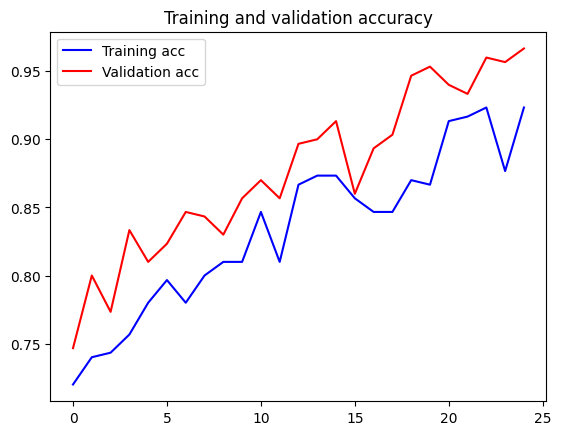

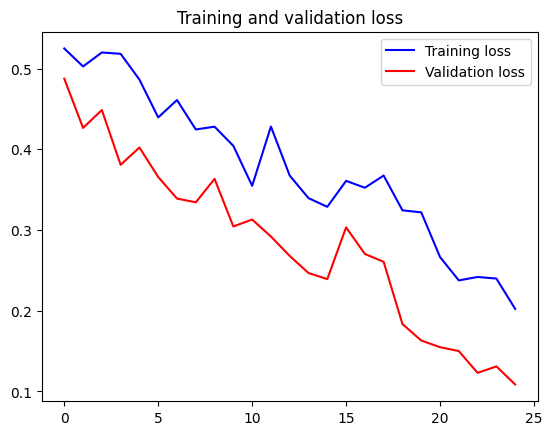

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Predicting a given Signature as Genuine or Forged**

In [ ]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Signature_Forgery/data/test_set/forged/NFI-00101014.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

1/1 [==============================] - 0s 85ms/step


{'forged': 0, 'genuine': 1}

In [ ]:
if result[0][0] == 1:
  prediction = 'genuine'
else:
  prediction = 'forged'
print(prediction)

forged


In [ ]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Signature_Forgery/single_prediction/NFI-00202002.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'genuine'
else:
  prediction = 'forged'
print(prediction)

1/1 [==============================] - 0s 19ms/step
genuine


**Seconnd CNN Model**

In [ ]:
cnn2 = tf.keras.models.Sequential()
cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3],padding='same'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='same'))
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding='same'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='same'))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(units=1000, activation='relu'))
cnn2.add(tf.keras.layers.Dense(units=100, activation='relu'))
cnn2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history2 = cnn2.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
10/10 [==============================] - 9s 864ms/step - loss: 1.0500 - accuracy: 0.4733 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 2/25
10/10 [==============================] - 10s 1s/step - loss: 0.6966 - accuracy: 0.4933 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/25
10/10 [==============================] - 11s 1s/step - loss: 0.6931 - accuracy: 0.4600 - val_loss: 0.6925 - val_accuracy: 0.4967
Epoch 4/25
10/10 [==============================] - 15s 2s/step - loss: 0.6948 - accuracy: 0.5200 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 5/25
10/10 [==============================] - 10s 1s/step - loss: 0.6913 - accuracy: 0.4867 - val_loss: 0.6842 - val_accuracy: 0.5933
Epoch 6/25
10/10 [==============================] - 11s 1s/step - loss: 0.6918 - accuracy: 0.4767 - val_loss: 0.6872 - val_accuracy: 0.5067
Epoch 7/25
10/10 [==============================] - 11s 1s/step - loss: 0.6900 - accuracy: 0.4900 - val_loss: 0.6847 - val_accuracy: 0.5467
Epoch 8/25
10/10 [

In [ ]:
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)             

In [ ]:
history2

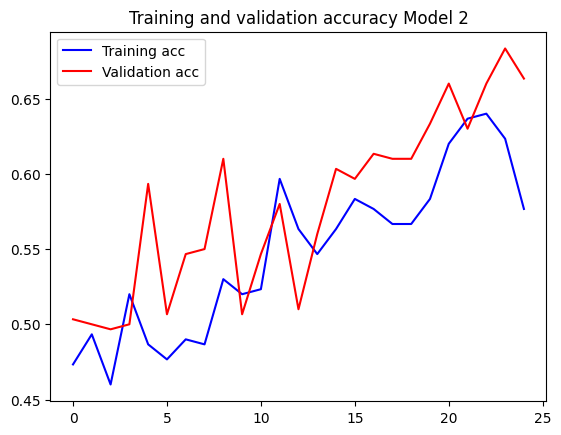

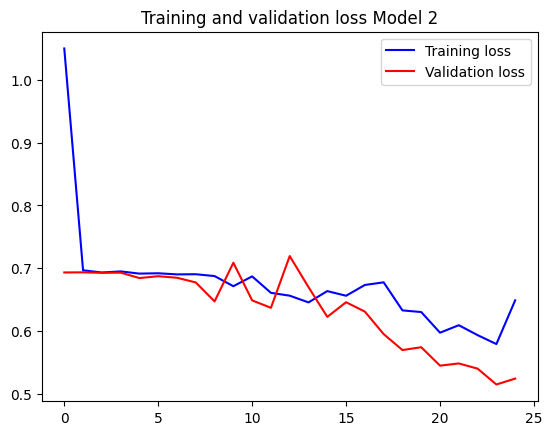

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'b', label='Training acc')
plt.plot(epochs2, val_acc2, 'r', label='Validation acc')
plt.title('Training and validation accuracy Model 2')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'b', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss Model 2')
plt.legend()

plt.show()

**Model 3**

In [ ]:
cnn3 = tf.keras.models.Sequential()
cnn3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3],padding='same'))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='same'))
cnn3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding='same'))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='same'))
cnn3.add(tf.keras.layers.Flatten())
cnn3.add(tf.keras.layers.Dense(units=512, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001),activation='relu'))
cnn3.add(tf.keras.layers.Dropout(0.5))
cnn3.add(tf.keras.layers.Dense(units=64, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001),activation='relu'))
cnn3.add(tf.keras.layers.Dropout(0.5))
cnn3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history3 = cnn3.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
10/10 [==============================] - 13s 1s/step - loss: 0.8764 - accuracy: 0.4800 - val_loss: 0.7715 - val_accuracy: 0.5000
Epoch 2/25
10/10 [==============================] - 10s 972ms/step - loss: 0.7636 - accuracy: 0.5000 - val_loss: 0.7555 - val_accuracy: 0.5000
Epoch 3/25
10/10 [==============================] - 10s 1s/step - loss: 0.7552 - accuracy: 0.4700 - val_loss: 0.7499 - val_accuracy: 0.5000
Epoch 4/25
10/10 [==============================] - 8s 782ms/step - loss: 0.7526 - accuracy: 0.4867 - val_loss: 0.7471 - val_accuracy: 0.5000
Epoch 5/25
10/10 [==============================] - 11s 1s/step - loss: 0.7462 - accuracy: 0.5067 - val_loss: 0.7449 - val_accuracy: 0.5000
Epoch 6/25
10/10 [==============================] - 10s 1s/step - loss: 0.7438 - accuracy: 0.4933 - val_loss: 0.7426 - val_accuracy: 0.5000
Epoch 7/25
10/10 [==============================] - 8s 801ms/step - loss: 0.7419 - accuracy: 0.4500 - val_loss: 0.7406 - val_accuracy: 0.5000
Epoch 8/25
10

In [ ]:
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 512)              

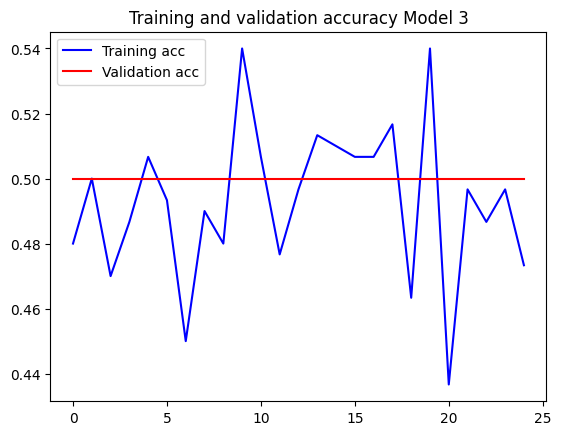

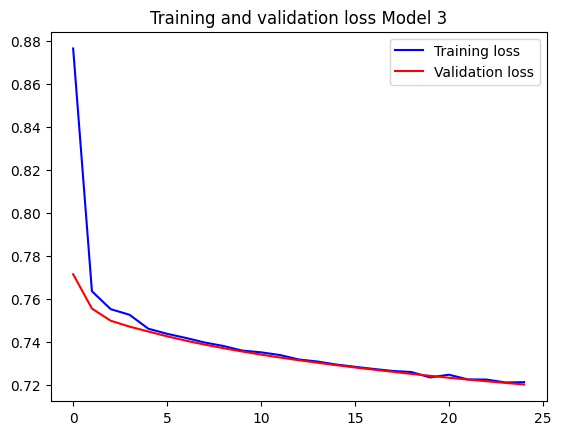

In [ ]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs3 = range(len(acc3))

plt.plot(epochs3, acc3, 'b', label='Training acc')
plt.plot(epochs3, val_acc3, 'r', label='Validation acc')
plt.title('Training and validation accuracy Model 3')
plt.legend()

plt.figure()

plt.plot(epochs3, loss3, 'b', label='Training loss')
plt.plot(epochs3, val_loss3, 'r', label='Validation loss')
plt.title('Training and validation loss Model 3')
plt.legend()

plt.show()

**Model 4**

In [ ]:
cnn4 = tf.keras.models.Sequential()
cnn4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn4.add(tf.keras.layers.Flatten())
cnn4.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history4 = cnn4.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
10/10 [==============================] - 10s 1s/step - loss: 1.0509 - accuracy: 0.4667 - val_loss: 0.6927 - val_accuracy: 0.5033
Epoch 2/25
10/10 [==============================] - 9s 958ms/step - loss: 0.6967 - accuracy: 0.5067 - val_loss: 0.6913 - val_accuracy: 0.5400
Epoch 3/25
10/10 [==============================] - 7s 715ms/step - loss: 0.6932 - accuracy: 0.4700 - val_loss: 0.6891 - val_accuracy: 0.5167
Epoch 4/25
10/10 [==============================] - 8s 788ms/step - loss: 0.6915 - accuracy: 0.5200 - val_loss: 0.6885 - val_accuracy: 0.4500
Epoch 5/25
10/10 [==============================] - 9s 974ms/step - loss: 0.7224 - accuracy: 0.4900 - val_loss: 0.6816 - val_accuracy: 0.5533
Epoch 6/25
10/10 [==============================] - 10s 1s/step - loss: 0.6886 - accuracy: 0.5267 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 7/25
10/10 [==============================] - 10s 981ms/step - loss: 0.6898 - accuracy: 0.5300 - val_loss: 0.6808 - val_accuracy: 0.5067
Epoch 8/2

In [ ]:
cnn4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 512)              

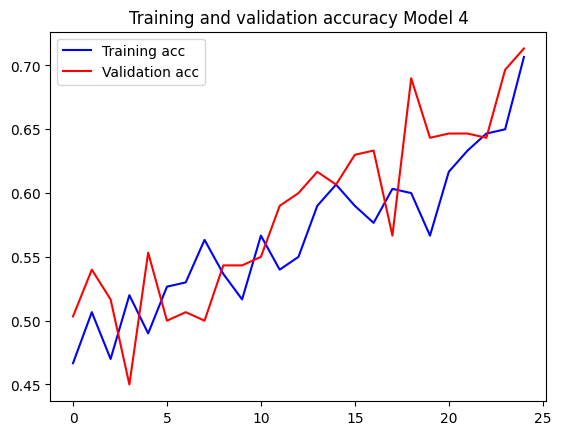

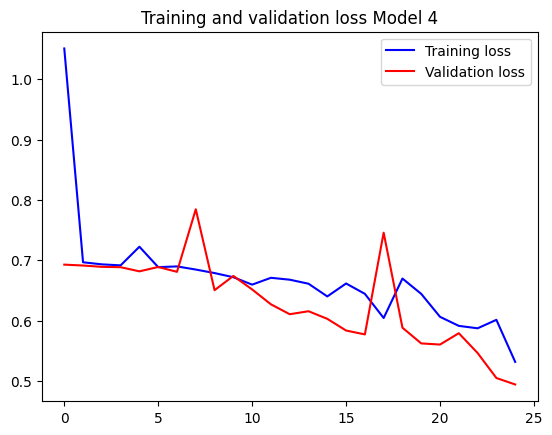

In [ ]:
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs4 = range(len(acc4))

plt.plot(epochs4, acc4, 'b', label='Training acc')
plt.plot(epochs4, val_acc4, 'r', label='Validation acc')
plt.title('Training and validation accuracy Model 4')
plt.legend()

plt.figure()

plt.plot(epochs4, loss4, 'b', label='Training loss')
plt.plot(epochs4, val_loss4, 'r', label='Validation loss')
plt.title('Training and validation loss Model 4')
plt.legend()

plt.show()

**New Code Ends Here**

**VGG16 Implementation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define your data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

from keras import applications
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense
from keras.optimizers import SGD

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.summary()

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(1, activation='sigmoid'))  # Change to 1 unit for binary classification

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

batch_size = 32
epochs = 50

history = model.fit(x=training_set, validation_data=test_set, epochs=25)


Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                             

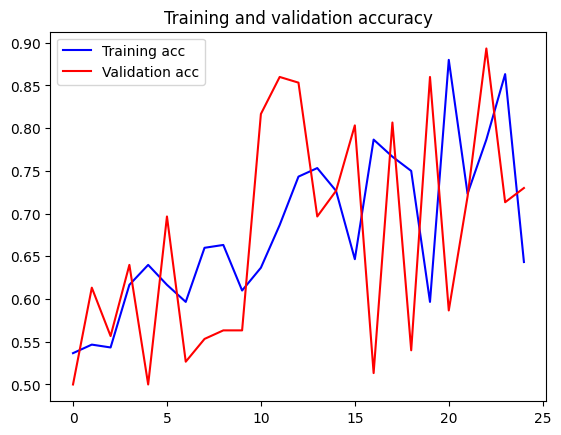

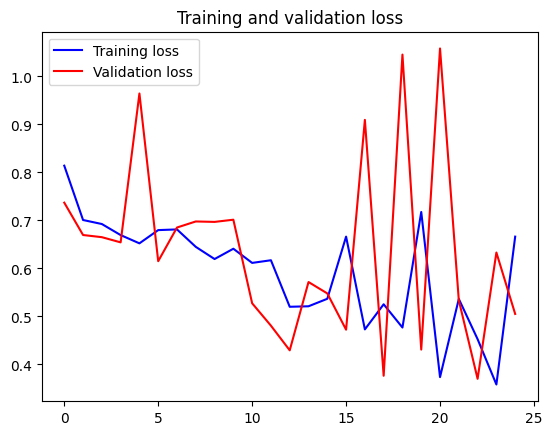

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()